# Anova

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. 

## Types of Annova
* One-way : one independent variable
* Two-way : two independent variables

## One-way Annova

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
heights_us = [180, 183, 172, 178, 169, 179, 178, 180]
heights_uk = [185, 181, 180, 179, 164, 165, 180, 178]
heights_india = [170, 183, 172, 175, 164, 170, 176, 167]

all_heights = [heights_us,heights_uk,heights_india]

### Calculate individual mean

In [3]:
mean_us = np.mean(heights_us)
mean_uk = np.mean(heights_uk)
mean_india = np.mean(heights_india)

all_means = [mean_us,mean_uk,mean_india]

### Calculate grouped mean

In [4]:
grouped_mean = (mean_us + mean_uk + mean_india)/3

### Calculate sum of squares within groups (SSW)

In [5]:
SSW = 0
for i in range(0,3):
    mean1 = np.mean(all_heights[i])
    print(f"Mean {i}: {mean1}")
    for j in all_heights[i]:
        print(f"{j} --> {(j-mean1)**2}")
        SSW += (j-mean1)**2
        
print(SSW)

Mean 0: 177.375
180 --> 6.890625
183 --> 31.640625
172 --> 28.890625
178 --> 0.390625
169 --> 70.140625
179 --> 2.640625
178 --> 0.390625
180 --> 6.890625
Mean 1: 176.5
185 --> 72.25
181 --> 20.25
180 --> 12.25
179 --> 6.25
164 --> 156.25
165 --> 132.25
180 --> 12.25
178 --> 2.25
Mean 2: 172.125
170 --> 4.515625
183 --> 118.265625
172 --> 0.015625
175 --> 8.265625
164 --> 66.015625
170 --> 4.515625
176 --> 15.015625
167 --> 26.265625
804.75


### Calculate sum of squares between groups (SSB)

In [6]:
SSB = 0
for i in range(3):
    SSB = SSB + len(all_heights[i]) * ((all_means[i]-grouped_mean)**2)
print(SSB)

126.58333333333334


### Calulate degrees of freedom for between and within the groups (dfB and dfW)

In [7]:
dfB = len(all_heights) - 1
dfW = len(all_heights) * (len(all_heights[0])-1)

In [8]:
dfB

2

In [9]:
dfW

21

### Calculate f-statistic

In [10]:
f_stat = (SSB/dfB)/(SSW/dfW)

In [11]:
f_stat

1.651599875737807

In [12]:
ALPHA = 0.05 

f_critical = 5.78

In [13]:
if f_stat > f_critical:
    print("Reject the NULL Hypothesis")
else:
    print("Accept the NULL Hypothesis")

Accept the NULL Hypothesis


### Let's calculate using statsmodel

In [14]:
from statsmodels.stats.oneway import anova_oneway

anova_oneway([heights_us, heights_uk, heights_india], use_var="equal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.6515998757378068
pvalue = 0.21569312475906252
df = (2.0, 21.0)
df_num = 2.0
df_denom = 21.0
nobs_t = 24.0
n_groups = 3
means = array([177.375, 176.5  , 172.125])
nobs = array([8., 8., 8.])
vars_ = array([21.125     , 59.14285714, 34.69642857])
use_var = 'equal'
welch_correction = True
tuple = (1.6515998757378068, 0.21569312475906252)

## Two-way

### Problem Statement

The illness caused by a virus in a city concerning some restaurant inspectors is not consistent with their evaluations of cleanliness of restaurants. In order to investigate this possibility, the director has five restaurant inspectors to grade the cleanliness of three restaurants. The results are shown below.

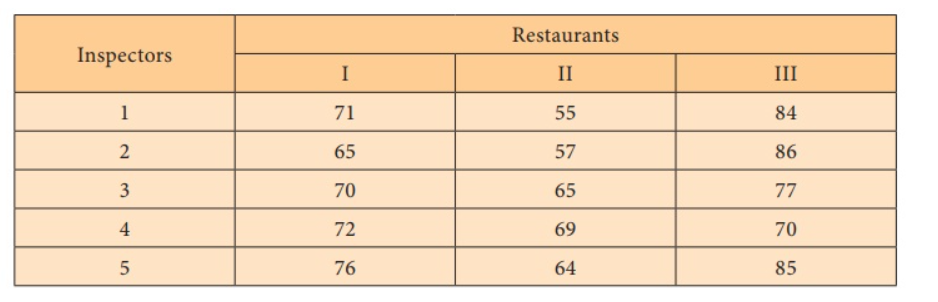

### Solution:

In [15]:
ins_res = {1:[71,55,84],2:[65,57,86],3:[70,65,77],4:[72,69,70],5:[76,64,85]}

In [16]:
total_sum_all_points = 0
sumlist_by_each_inspector = list()
total_items_count = 0
for key,value in ins_res.items():
    total_sum_all_points += sum(value)
    sumlist_by_each_inspector.append(sum(value))
    total_items_count += len(value)
    
print(total_sum_all_points)
print(sumlist_by_each_inspector)

1066
[210, 208, 212, 211, 225]


In [17]:
sumlist_square_by_each_inspector = list()
sumlist_square_by_each_inspector = [i*i for i in sumlist_by_each_inspector]

sumlist_square_by_each_restaurant = list()
for i in range(0,len(ins_res[1])):
    sum1 = 0
    for j in range(0,len(ins_res)):
        sum1 += ins_res[j+1][i]
    sumlist_square_by_each_restaurant.append(sum1**2)

In [18]:
sumlist_square_by_each_inspector , sumlist_square_by_each_restaurant

([44100, 43264, 44944, 44521, 50625], [125316, 96100, 161604])

In [19]:
squares_of_each_item = list()
for key,value in ins_res.items():
    for j in ins_res[key]:
        squares_of_each_item.append(j*j)
        
print(squares_of_each_item)

[5041, 3025, 7056, 4225, 3249, 7396, 4900, 4225, 5929, 5184, 4761, 4900, 5776, 4096, 7225]


In [20]:
Correction_factor = round(total_sum_all_points ** 2/total_items_count,2)
Total_sum_of_squares = sum(squares_of_each_item) - Correction_factor

### Calculate sum of squares due to treatment (all the data row-wise) - SST

In [21]:
SST = round((sum(sumlist_square_by_each_inspector)/ len(ins_res[1])) - Correction_factor,2)

### Calculate sum of squares due to blocks (all the data row-wise) - SSB

In [22]:
SSB = round((sum(sumlist_square_by_each_restaurant)/ len(ins_res)) - Correction_factor,2)

In [23]:
SST,SSB

(60.93, 846.93)

### Calculate sum of squares due to error

In [24]:
SSE = Total_sum_of_squares - SST - SSB

### Calculate degrees of freedom for inspectors

In [25]:
df_inspector = (len(ins_res) - 1) # degrees of freedom for inspectors

### Calculate degrees of freedom for restaurants

In [26]:
df_restaurant = (len(ins_res[1]) - 1) # degrees of freedom for restaurants 

### Degress of freedom due to error

In [27]:
df_error = df_inspector * df_restaurant
df_error

8

### Calculate Mean Square Error

In [28]:
MSE = SSE/df_error

### Calculate f-statistic for between inspectors

In [29]:
f_stat_inspector = round((SST / df_inspector) / MSE,2)

### Calculate f-statistic for between restaurants

In [30]:
f_stat_restaurant = round((SSB / df_restaurant) / MSE,2)

In [31]:
f_stat_inspector , f_stat_restaurant

(0.38, 10.49)

### For calculating critical values

In [32]:
# inspector - (df_inspector, df_error)
# restaurant - (df_restaurant, df_error)

ALPHA = 0.05
f_inspector_critical = 3.838 
f_restaurant_critical = 4.459

### Let's check NULL hypothesis for inspectors

In [33]:
if f_stat_inspector < f_inspector_critical:
    print("Accept the NULL hypothesis, i.e., we conclude that there is no significant difference among the mean cleanliness scores of inspectors.")

else:
    print("Reject the NULL hypothesis, i.e., we conclude that there is no significant difference among the mean cleanliness scores of inspectors.")

Accept the NULL hypothesis, i.e., we conclude that there is no significant difference among the mean cleanliness scores of inspectors.


### Let's check NULL hypothesis for restaurants

In [34]:
if f_stat_restaurant < f_restaurant_critical:
    print("Accept the NULL hypothesis, i.e., we conclude that there is no significant difference in atleast one pair of restaurants over their mean cleanliness scores.")

else:
    print("Reject the NULL hypothesis, i.e., we conclude that there exists significant difference in atleast one pair of restaurants over their mean cleanliness scores.")

Reject the NULL hypothesis, i.e., we conclude that there exists significant difference in atleast one pair of restaurants over their mean cleanliness scores.
